# Introdução




Neste projeto, iremos analisar um conjunto de dados sobre o tráfego na direção oeste da rodovia interestadual I-94.

O objetivo da nossa análise é identificar alguns indicadores de tráfego intenso na I-94. Esses indicadores podem estar relacionados a condições climáticas, hora do dia, dia da semana, entre outros fatores.

# Importando o Dataset (i-94 Traffic)

In [3]:
import pandas as pd

df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
df.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


O dataset possui 48204 linhas e 9 colunas, e existem valores não nulos. Cada linha descreve o tráfego e o clima para uma hora específica.

Uma estação localizada aproximadamente no meio do caminho entre Minneapolis e Saint Paul é responsável por registrar os dados de tráfego (conforme descrito na documentação do conjunto de dados).

Para essa estação, a direção da via é sentido oeste — ou seja, os veículos estão se deslocando de leste para oeste.

Isso significa que os resultados da nossa análise se referem especificamente ao tráfego no sentido oeste nas proximidades dessa estação. Em outras palavras, não devemos generalizar nossas conclusões para toda a rodovia I-94.

# Análise do Volume de Tráfego

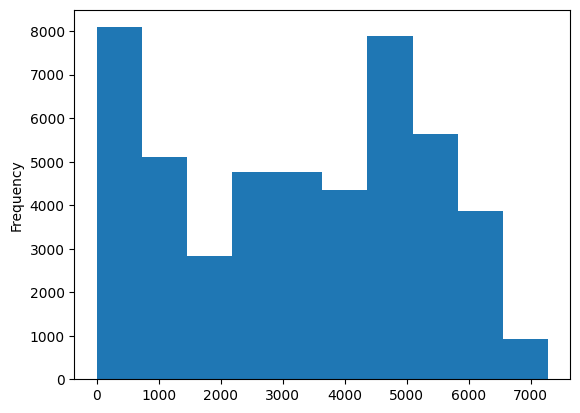

In [6]:
import matplotlib.pyplot as plt # para visuaização de dados
%matplotlib inline
df['traffic_volume'].plot.hist()
plt.show()

In [7]:
df['traffic_volume'].describe()

,traffic_volume
count,48204.000000
mean,3259.818355
std,1986.860670
min,0.000000
25%,1193.000000
50%,3380.000000
75%,4933.000000
max,7280.000000


Entre 02/10/2012 às 09:00 e 30/09/2018 às 23:00, o volume de tráfego horário variou de 0 a 7.280 veículos, com uma média de 3.260 veículos por hora.

Em aproximadamente 25% do tempo, passaram 1.193 carros ou menos por hora — o que provavelmente ocorre durante a noite ou em períodos de obras na pista. Por outro lado, em outros 25% do tempo, o volume de tráfego foi quatro vezes maior (4.933 carros ou mais por hora).

Essa observação oferece um caminho interessante para a análise: comparar os dados do período diurno com os do período noturno.


# Volume de Tráfego: Dia vs. Voite

In [8]:
# Começaremos dividindo o dataset em duas partes (dia e noite)

df['date_time'] = pd.to_datetime(df['date_time']) # conversão para dados de data e hora

day = df.copy()[(df['date_time'].dt.hour >= 7) & (df['date_time'].dt.hour < 19)]
print(day.shape)

night = df.copy()[(df['date_time'].dt.hour < 7) | (df['date_time'].dt.hour >= 19)]
print(night.shape)


(23877, 9)
(24327, 9)


A diferença no número de linhas entre dia e noite é devido às horas de dados perdidos.

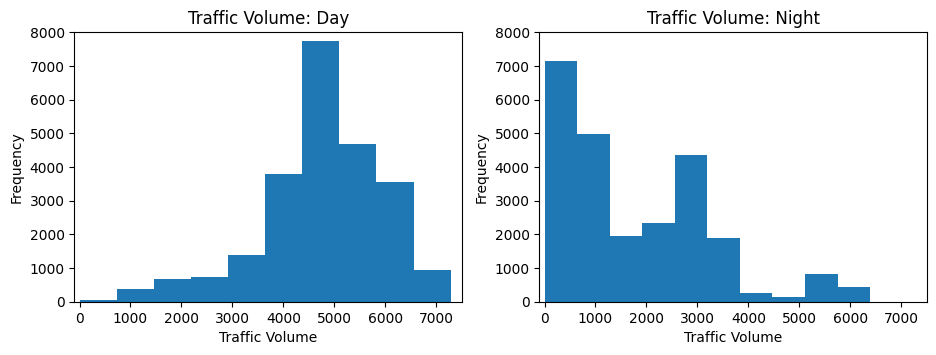

In [9]:
# Olhando para os histogramas isolados:

plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

In [10]:
day['traffic_volume'].describe()

,traffic_volume
count,23877.000000
mean,4762.047452
std,1174.546482
min,0.000000
25%,4252.000000
50%,4820.000000
75%,5559.000000
max,7280.000000


In [11]:
night['traffic_volume'].describe()

,traffic_volume
count,24327.000000
mean,1785.377441
std,1441.951197
min,0.000000
25%,530.000000
50%,1287.000000
75%,2819.000000
max,6386.000000


O histograma que mostra a distribuição do volume de tráfego durante o dia apresenta **assimetria à esquerda**. Isso significa que a maior parte dos valores de volume de tráfego é **alta** — em **75% do tempo**, passam **4.252 carros ou mais por hora** pela estação (pois apenas 25% dos valores são menores que 4.252).

Já o histograma que representa os dados do período **noturno** é **assimétrico à direita**, indicando que a maioria dos valores de volume de tráfego é **baixa** — em **75% do tempo**, passam **menos de 2.819 carros por hora**.

Embora ainda existam medições superiores a **5.000 carros por hora**, o tráfego noturno é, em geral, **leve**. Como nosso objetivo é **identificar indicadores de tráfego intenso**, a partir deste ponto **focaremos apenas nos dados do período diurno**.


# Indicadores de tempo

Um dos possíveis indicadores de tráfego intenso é o tempo. Pode haver mais pessoas nas estradas em determinados meses, em certos dias da semana ou em certos horários do dia.

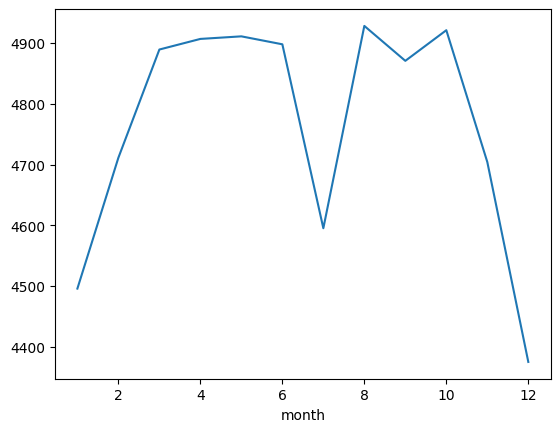

In [12]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month')['traffic_volume'].mean()
by_month.plot.line()
plt.show()

O tráfego parece menos intenso durante os meses frios (novembro a fevereiro) e mais intenso nos meses quentes (março a outubro), com uma exceção interessante: julho. Há algo de especial em julho? O tráfego é significativamente menor em julho a cada ano?

Para responder a essa pergunta, vamos analisar como o volume de tráfego mudou em julho ao longo dos anos.

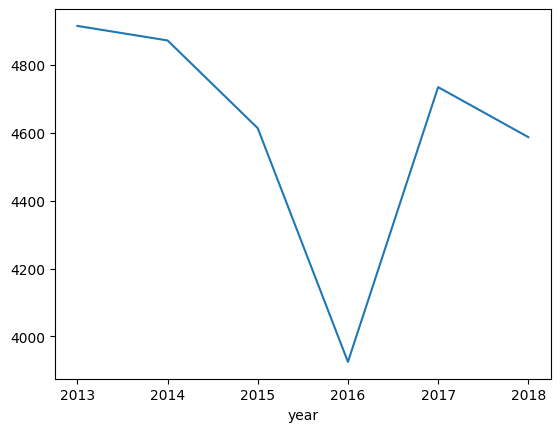

In [13]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
only_july.groupby('year')['traffic_volume'].mean().plot.line()
plt.show()

Normalmente, o tráfego em julho é bastante intenso, semelhante aos outros meses quentes. A única exceção observada foi 2016, quando houve uma queda significativa no volume de tráfego. Uma possível explicação para isso é a realização de obras na estrada — este artigo de 2016 corrobora essa hipótese (https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696)

Como conclusão preliminar, podemos afirmar que os meses quentes geralmente apresentam tráfego mais intenso em comparação com os meses frios. Em um mês quente, é possível esperar que, a cada hora do período diurno, o volume de tráfego fique próximo de 5.000 veículos.

# Buscando maior granularidade

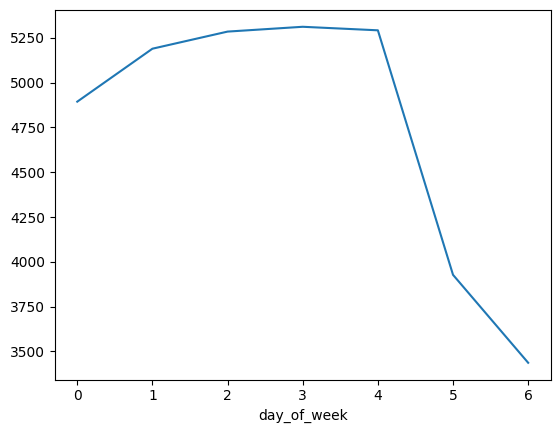

In [14]:
# vamos analisar os dados em relação ao dia da semana

day['day_of_week'] = day['date_time'].dt.dayofweek
by_day = day.groupby('day_of_week')['traffic_volume'].mean()
by_day.plot.line()
plt.show()

O volume de tráfego é significativamente maior em dias úteis.

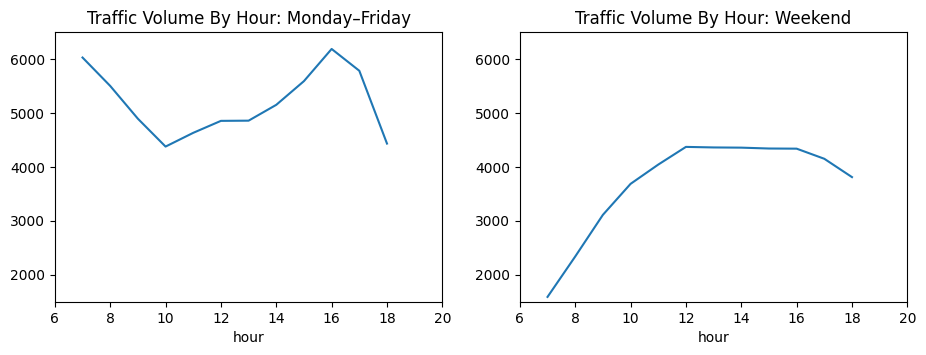

In [15]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['day_of_week'] <= 4] # 4 == Friday
weekend = day.copy()[day['day_of_week'] >= 5] # 5 = Saturday
by_hour_business = bussiness_days.groupby('hour').mean(numeric_only=True)
by_hour_weekend = weekend.groupby('hour').mean(numeric_only=True)


plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

Ao longo do dia, o volume de tráfego costuma ser maior durante os dias úteis em comparação com os finais de semana. Como esperado, os horários de pico ocorrem por volta das 7h e das 16h — momentos em que a maioria das pessoas se desloca de casa para o trabalho e vice-versa. Nesses horários, o tráfego pode ultrapassar 6.000 veículos por hora.

Em resumo, identificamos alguns indicadores relacionados ao tempo para tráfego intenso:

- O tráfego tende a ser mais intenso nos meses quentes (março a outubro) em comparação com os meses frios (novembro a fevereiro).

- O tráfego é geralmente maior nos dias úteis do que nos finais de semana.

- Nos dias úteis, os horários de pico são por volta das 7h e das 16h.

# Indicadores de Clima

Outra possibilidade que pode interferir no volume de tráfego é o clima. Primeiramente, vamos olhar para algumas correlações entre as colunas de clima com o volume de tráfego.

In [16]:
day[['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']].corr()['traffic_volume']

,traffic_volume
temp,0.128317
rain_1h,0.003697
snow_1h,0.001265
clouds_all,-0.032932
traffic_volume,1.000000


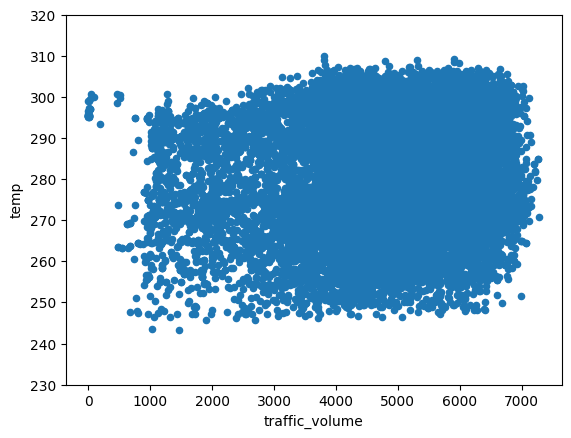

In [17]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320)
plt.show()

Aparentemente, a temperatura não demonstra ser um sólido indicador para o volume de tráfego.

Para uma melhor análise, vamos agrupar os dados por weather_main e olhar para as médias de traffic_volume

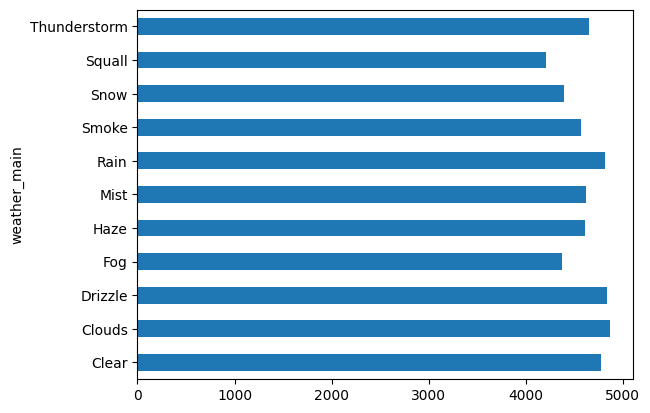

In [19]:
by_weather_main = day.groupby('weather_main').mean(numeric_only=True)
by_weather_main['traffic_volume'].plot.barh()
plt.show()

Parece-nos que para nenhum tipo de dado de clima o volume de tráfego ultrapassa 5000 carros.

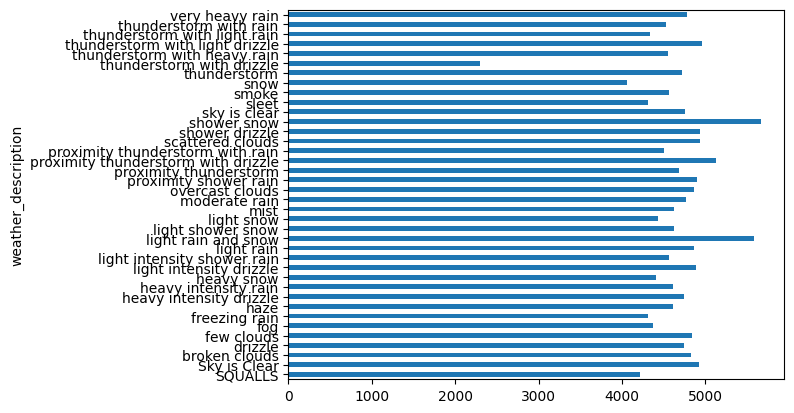

In [20]:
by_weather_description = day.groupby('weather_description').mean(numeric_only=True)
by_weather_description['traffic_volume'].plot.barh()
plt.show()

Existem três tipos de dados de clima em que o volume de tráfego ultrapassa 5000:

- 'Shower snow'
- 'Light rain and snow'
- 'Proximity thunderstorm with drizzle'

É curioso que estes tipos apresentem volumes grandes de tráfego, já que, aparentemente, representam um tempo não adequado. Talvez mais pessoas andam com seus carros em dias com clima ruim ao invés de andar com suas bicicletas ou caminhar.

# Conclusão
Neste projeto, tentamos encontrar alguns indicadores da densidade do tráfego na I-94 Interstate Highway. De maneira geral, dois indicadores foram analisados:

- Tempo:


1.   O tráfego é mais pesado durante meses quentes (Março - Outubro) quando comparado aos meses frios (Novembro - Fevereiro).
2. O tráfego é mais pesado em dias úteis quando comparado aos finais de semana.
3. Nos dias úteis, os horários de pico são entre 7 e 16

- Clima:

1. 'Shower snow'
2. 'Light rain and snow'
3. 'Proximity thunderstorm with drizzle'



